Use the following code snippet to set up the simulation. Note that we have defined a
reference signal, disturbance and measurement noise to be used throughout the assignment.

In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scipy as sp


Text(0.5, 0, 'Time (s)')

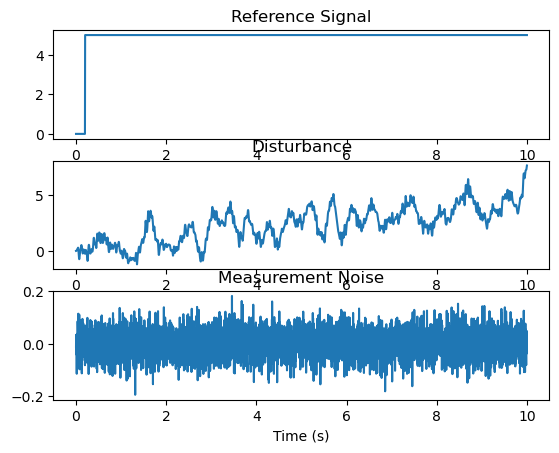

In [2]:
P = ct.tf([1, 3], [1, 8, 27, 50, 50])
N = 5000
duration = 10
t = np.linspace(0,duration,N)
n = 0.05*np.random.randn(N)
b1, a1 = sp.signal.butter(5, 0.1, 'low')
b2, a2 = sp.signal.butter(5, 0.01, 'low')
d = 10*sp.signal.lfilter(b2, a2, np.random.randn(N))
d += sp.signal.lfilter(b1, a1, np.random.randn(N))
d += np.linspace(0,5,N)
r = 5*np.ones(N)
r[0:100] = np.zeros(100)
fig, ax = plt.subplots(3,1)
ax[0].plot(t,r)
ax[0].set_title('Reference Signal')
ax[0].set_xlabel('Time (s)')
ax[1].plot(t,d)
ax[1].set_title('Disturbance')
ax[1].set_xlabel('Time (s)')
ax[2].plot(t,n)
ax[2].set_title('Measurement Noise')
ax[2].set_xlabel('Time (s)')

***
### Question 1

Select a value for Kp such that the closed-loop system is stable, but nearly unstable.
Use the following code snippet to try different values of Kp. Start with a small value,
and gradually increase it until the closed-loop system seems like it is almost unstable.
In your report, note the value of Kp that you found. Include a plot of the Plant output
in the closed-loop system in your report.

Text(0.5, 0, 'Time (s)')

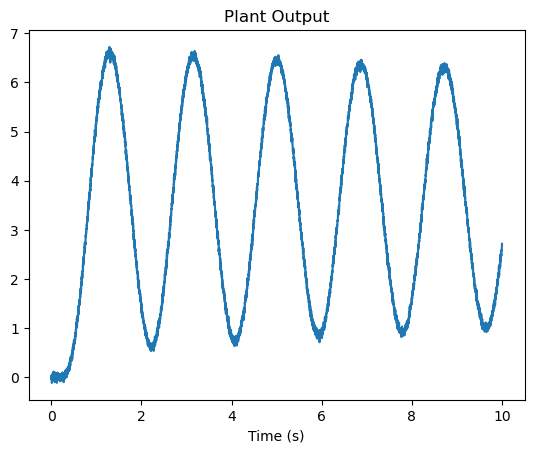

In [3]:
Kp = 42  # enter your value here
K = ct.tf(Kp,1)
T = K*P/(1+K*P)
S = 1/(1+K*P)
t,y_r = ct.forced_response(T,t,r)
t,y_n = ct.forced_response(S,t,n)
t,y_d = ct.forced_response(S*P,t,d)
y = y_r + y_n + y_d
fig, ax = plt.subplots(1)
ax.plot(t,y)
ax.set_title('Plant Output')
ax.set_xlabel('Time (s)')

***
### Question 2

Make a Root Locus plot of the plant. Mark the final closed-loop poles that you selected
in Question 1 on the plot. Use the following code snippet:

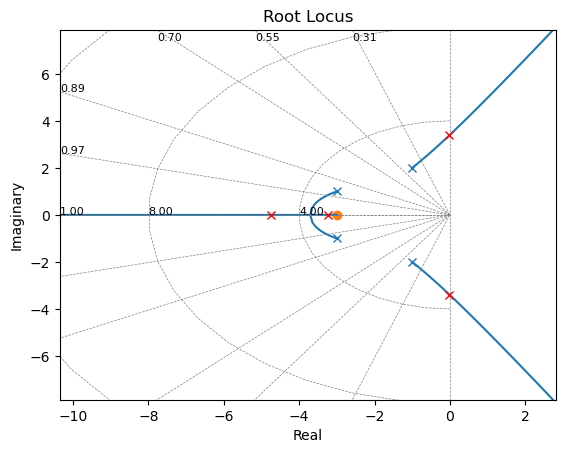

In [4]:
fig,ax = plt.subplots(1)
cl_poles, K_vec = ct.root_locus(P)
den_closed_loop = np.array([1, 8, 27, 92, 176]) # enter the denominator of your closed-loop system from Q1 here
cl_poles_selected = np.roots(den_closed_loop)
ax.plot(np.real(cl_poles_selected), np.imag(cl_poles_selected), 'rx')

***
### Question 3


Divide that value of Kp that you found by 2. Use this new value as the value for Kp
for the remainder of this assignment. Plot the closed-loop poles corresponding to this
value of Kp on the Root-Locus plot as well.

Text(0.5, 0, 'Time (s)')

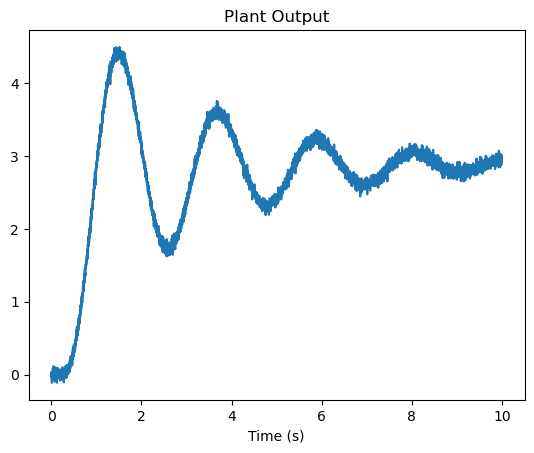

In [5]:
Kp = 21  # enter your value here
K = ct.tf(Kp,1)
T = K*P/(1+K*P)
S = 1/(1+K*P)
t,y_r = ct.forced_response(T,t,r)
t,y_n = ct.forced_response(S,t,n)
t,y_d = ct.forced_response(S*P,t,d)
y = y_r + y_n + y_d
fig, ax = plt.subplots(1)
ax.plot(t,y)
ax.set_title('Plant Output')
ax.set_xlabel('Time (s)')

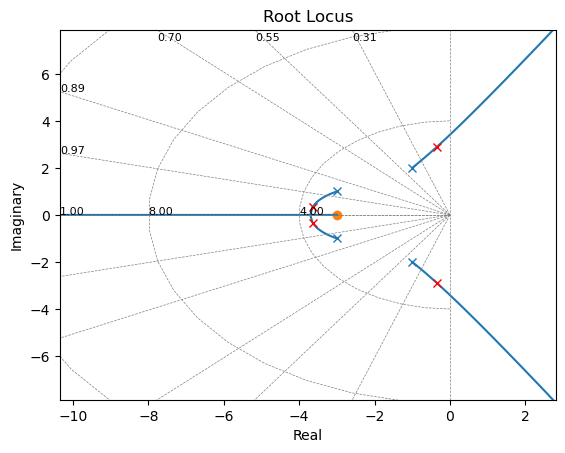

In [6]:
fig,ax = plt.subplots(1)
cl_poles, K_vec = ct.root_locus(P)
den_closed_loop = np.array([1, 8, 27, 71, 113]) # enter the denominator of your closed-loop system from Q1 here
cl_poles_selected = np.roots(den_closed_loop)
ax.plot(np.real(cl_poles_selected), np.imag(cl_poles_selected), 'rx')

***
### Question 4

Add derivative action to your controller. Select a value for Kd such that the step
response has a 2% settling time that is roughly 3 seconds (doesn’t need to be exact,
just close). Start with small values of Kd and slowly increase it until you satisfy the
requirement. Record the value of Kd you select and a plot of the Plant output of the
closed-loop system in your report.

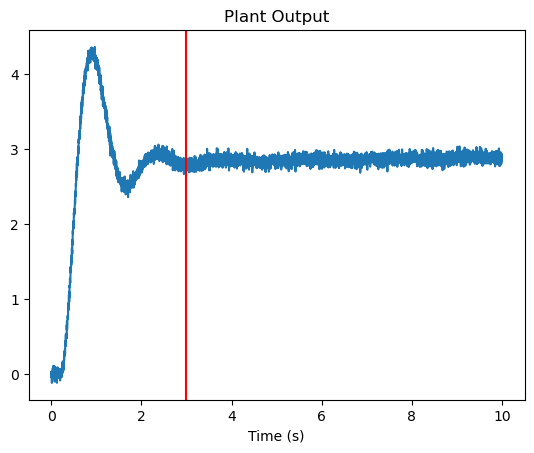

In [7]:
Kd = 15
K = ct.tf(Kp,1) + ct.tf([Kd, 0], [0.01, 1])
T = K*P/(1+K*P)
S = 1/(1+K*P)
t,y_r = ct.forced_response(T,t,r)
t,y_n = ct.forced_response(S,t,n)
t,y_d = ct.forced_response(S*P,t,d)
y = y_r + y_n + y_d
fig, ax = plt.subplots(1)
ax.plot(t,y)
ax.set_title('Plant Output')
ax.set_xlabel('Time (s)')
plt.axvline(x=3, color='r', linestyle='-')

***
### Question 5


$$
E(s) = S(s) + R(s)
$$

$$
E(s) = \frac{1}{1 + P(s)K(s)} \cdot R(s)
$$

$$
\frac{1}{1 + \frac{s+3}{s^4 + 8s^3 + 27s^2 + 50s + 50} + (s+3)(Kp + Kd)} \cdot R(s)
$$

$$
E(s) = \frac{s^4 + 8s^3 + 27s^2 + 50s + 50}{1s^4 + 8s^3 + 27s^2 + 50s + 50 + (s+3)(Kp+Kd)} \cdot 5
$$

$$
\lim_{{s \to 0}} sE(s) = \frac{250}{50 + 3K_p}
$$

$$
= \frac{250}{50 + 3(21)} = 2.212
$$


***
### Question 6

Now we will add integral action to eliminate the steady state error when the input is
a step with magnitude 5. Select a value for Ki such that the step response reaches 5
within 4 seconds. Start with small values of Ki and slowly increase it until you satisfy
the requirement. Record the value of Ki you select and a plot of the Plant output of
the closed-loop system in your report.

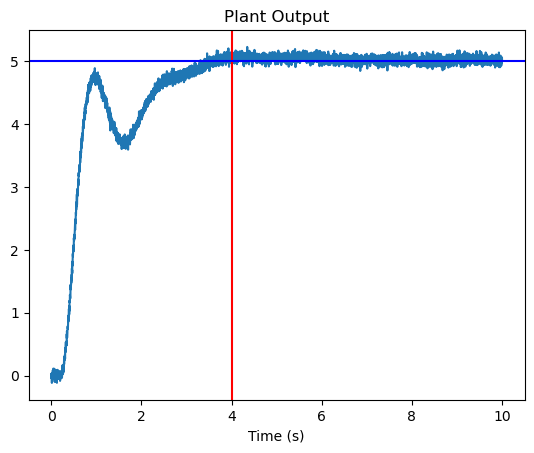

In [8]:
Ki = 26 # enter your value here
K = ct.tf(Kp,1) + ct.tf([Kd, 0], [0.01, 1]) + ct.tf([Ki], [1, 0])
T = K*P/(1+K*P)
S = 1/(1+K*P)
t,y_r = ct.forced_response(T,t,r)
t,y_n = ct.forced_response(S,t,n)
t,y_d = ct.forced_response(S*P,t,d)
y = y_r + y_n + y_d
fig, ax = plt.subplots(1)
ax.plot(t,y)
ax.set_title('Plant Output')
ax.set_xlabel('Time (s)')
plt.axvline(x=4, color='r', linestyle='-') 
plt.axhline(y=5, color='b', linestyle='-') # Beta is 18

***
### Question 7

How effectively is the controller rejecting the disturbance signal?

The controller effectively counters disturbances, a feature mainly due to the integral part of the PID controller. This integral function plays a critical role in removing steady-state errors through the accumulation of error over time and subsequent adjustment of the control output. This process corrects any constant discrepancies resulting from disturbances, striving for a zero-error steady state. As a result, the system's output is predominantly undisturbed by external factors, except for the impact of sensor noise. The ability of the integral controller to neutralize disturbances and preserve the desired steady-state performance highlights its importance in ensuring accurate control and stability in the system's behavior.

***
### Question 8

Make a Bode plot of the sensitivity, complementary sensitivity and loop transfer functions.

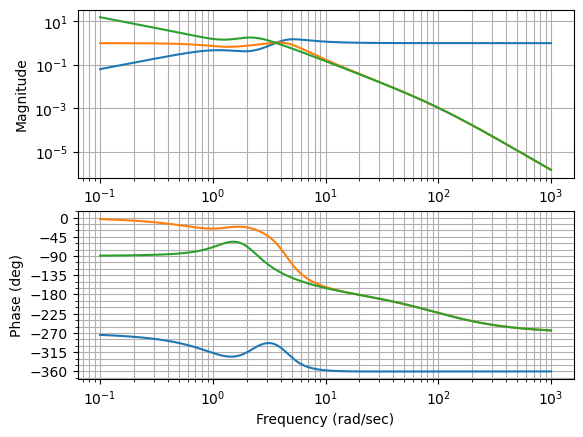

In [9]:
S = 1/(1+K*P)
T = K*P/(1+K*P)
L = K*P
mag, phase, w = ct.bode_plot([S,T,L])

***
### Question 9

Simulate the closed-loop system with a different reference. Based on the Bode plots of
the previous question, does the response to this input make sense? Include the plot of
the desired vs. actual output in your report.

Text(0.5, 0, 'Time (s)')

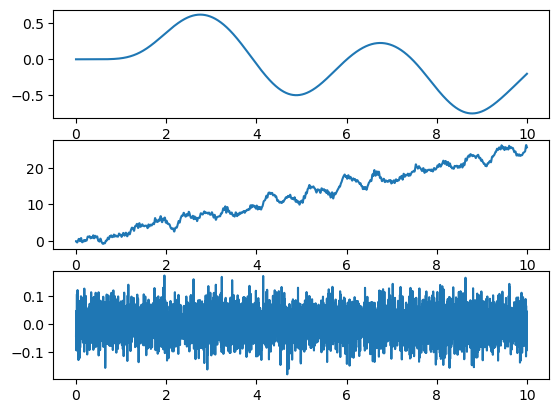

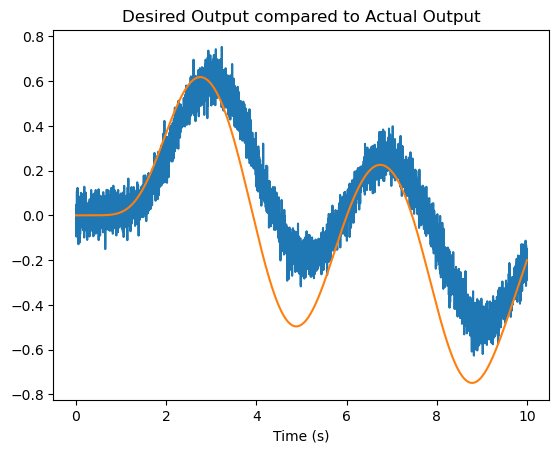

In [110]:
n = 0.05*np.random.randn(N)
d = 10*sp.signal.lfilter(b2, a2, np.random.randn(N))
d += sp.signal.lfilter(b1, a1, np.random.randn(N))
d += 5*np.linspace(0,5,N)
b3, a3 = sp.signal.butter(5, 0.001, 'low')
r = 10*sp.signal.lfilter(b3, a3, np.random.randn(N))
fig, ax = plt.subplots(3,1)
ax[0].plot(t,r)
ax[1].plot(t,d)
ax[2].plot(t,n)
t,y_r = ct.forced_response(T,t,r)
t,y_n = ct.forced_response(S,t,n)
t,y_d = ct.forced_response(S*P,t,d)
y = y_r + y_n + y_d
fig, ax = plt.subplots(1)
ax.plot(t,y, label='actual output')
ax.plot(t,r, label='desired output')
ax.set_title('Desired Output compared to Actual Output')
ax.set_xlabel('Time (s)')

yes, the response to the input sort of makes sense

Effective Tracking Ability: The ability of the system to closely follow the target output highlights the precise tuning of the proportional (P) and integral (I) parts of the PID controller. This tuning ensures the system's response closely matches the desired reference. The proportional part promptly corrects deviations in the system's output, while the integral part addresses any persistent errors by accumulating the error over time and modifying the control measure to compensate.

Noise Issues: The presence of significant noise indicates that, although the PID controller excels at following the intended output, it struggles with noise reduction or compensation. This issue might stem from various causes, including the adjustment of the PID controller's derivative (D) element, which aims to anticipate and mitigate future system behavior by analyzing its current rate of change. If the noise mainly consists of high frequencies, it might be beneficial to adjust the derivative component to be less responsive to these frequencies or to implement additional filtering strategies to minimize noise effects on the system's performance.